### Feature Detection Analysis

In [ ]:
#     __  __    _                    _           _
#   /|  \/  |  (_)                  (_)         (_)
#  | | \  / |   _  __ ____  __   __  _  _ ____   _   _ ____    _____
#  | | |\/| | /| |/ /  _  \/\ \ / //| |/ / __/ /| | / / _  \ /| '_  \
#  | | |  | || | || | (_) |\ \ V /| | |\ \__ \| | || | (_) || | | | |
#  |_|_|  |_||_|_/ \_\___/  \_\_/ |_|_/|_|___/|_|_/ \_\___/ |_|_/ |_/
#
#  Copyright 2022, Miovision
#  @name    feature_detection_analysis 
#  @brief   Computes Features and Visualizes 
#  @author  Umer Rasheed

In [1]:
# Import Modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time as time
print('Import Modules!')

Import Modules!


In [2]:
# Set Directory
os.chdir('..')

In [3]:
# Import Local Modules
from utils.metrics import *
from utils.utils import *
from utils.pose_estimation import *

In [4]:
# Read Images from Video
path = 'videos/polaris/morris-lane-sb.mp4'
video, fps, total_frames = load_video(path) 
print("Frame Rate", fps)
print("Total Frames", total_frames)

Frame Rate 7.499932672003421
Total Frames 7203


In [5]:
# Set Other Hyperparameters
num_of_frames = 5
image_height = 400
image_width = 533

In [6]:
# Initialize Feature Extractor
feature_detector = FeatureDetector(mode = "Shi-Tomasi", output = "Corners", verbose = True)

Feature Extractor: Shi-Tomasi Output: Corners


Number of Features 200
Computation Time for Corner Detection (ms) 4.408359527587891
Computation Time for Corner Location Refinement (ms) 2.1653175354003906
Number of Features 200
Computation Time for Corner Detection (ms) 4.7206878662109375
Computation Time for Corner Location Refinement (ms) 2.390623092651367
Number of Features 200
Computation Time for Corner Detection (ms) 4.91023063659668
Computation Time for Corner Location Refinement (ms) 3.316640853881836
Number of Features 200
Computation Time for Corner Detection (ms) 4.107475280761719
Computation Time for Corner Location Refinement (ms) 2.7551651000976562
Number of Features 200
Computation Time for Corner Detection (ms) 3.6687850952148438
Computation Time for Corner Location Refinement (ms) 2.177000045776367


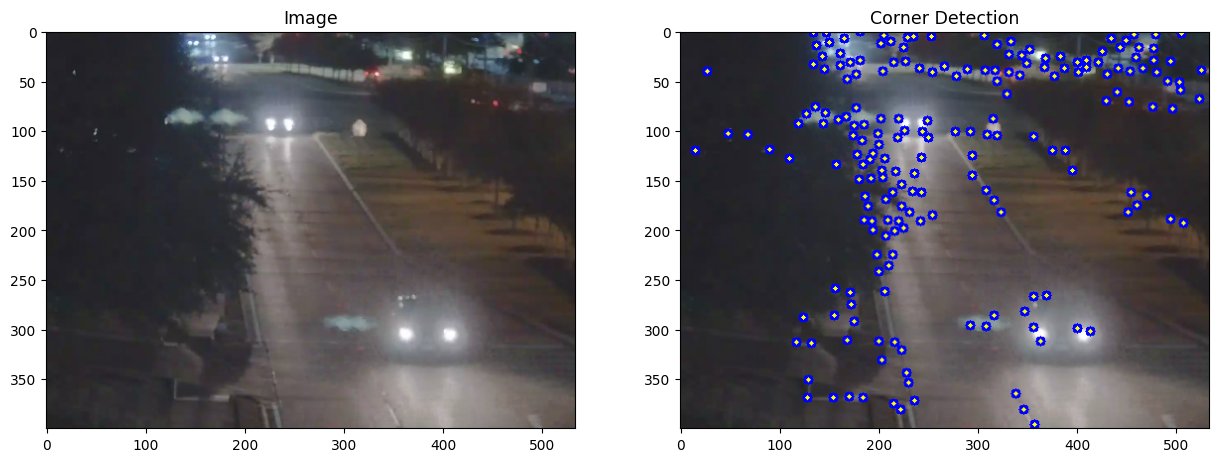

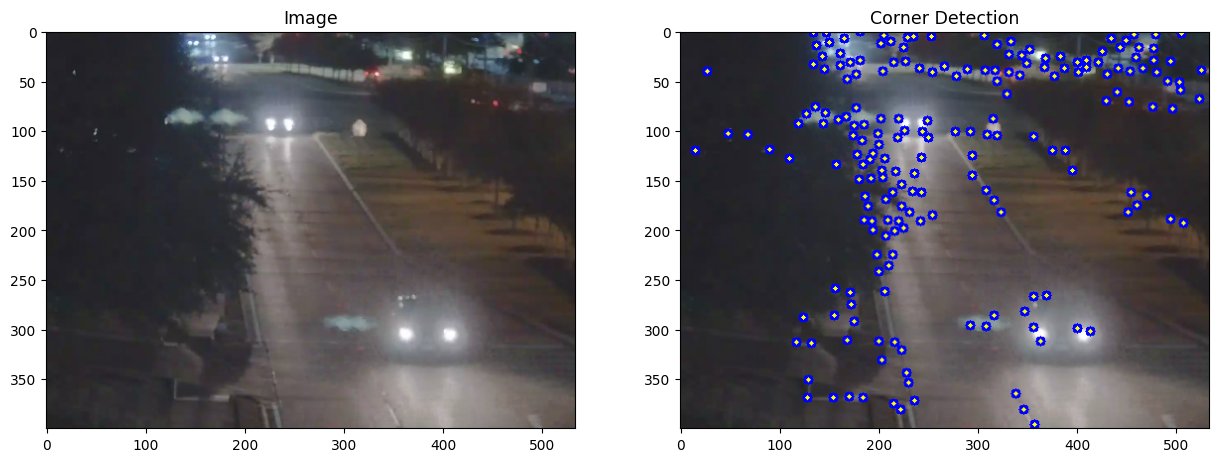

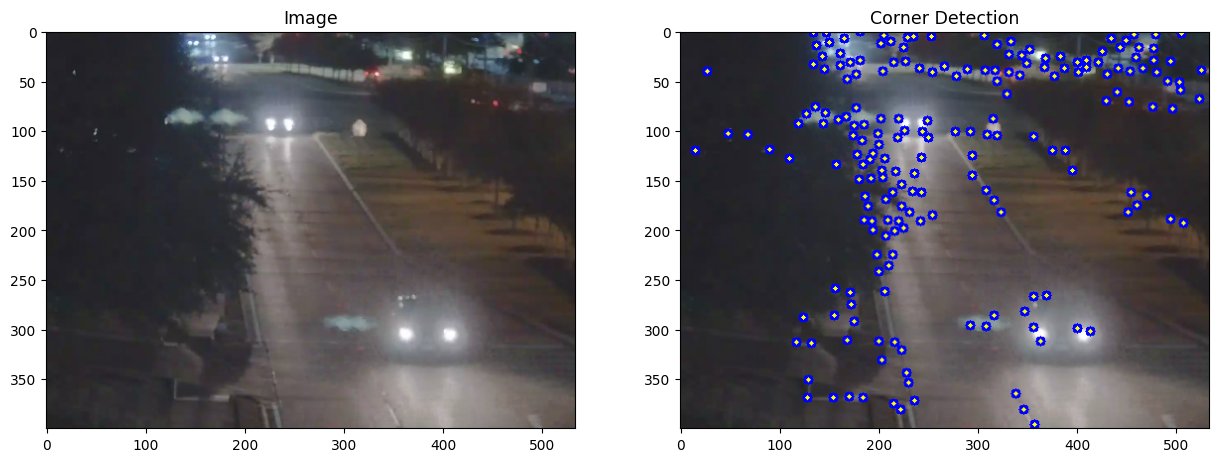

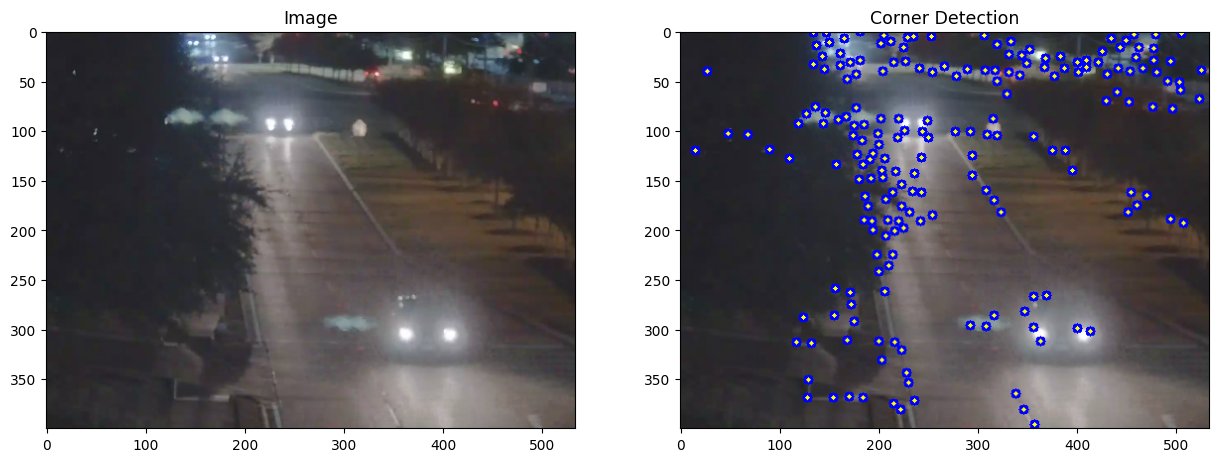

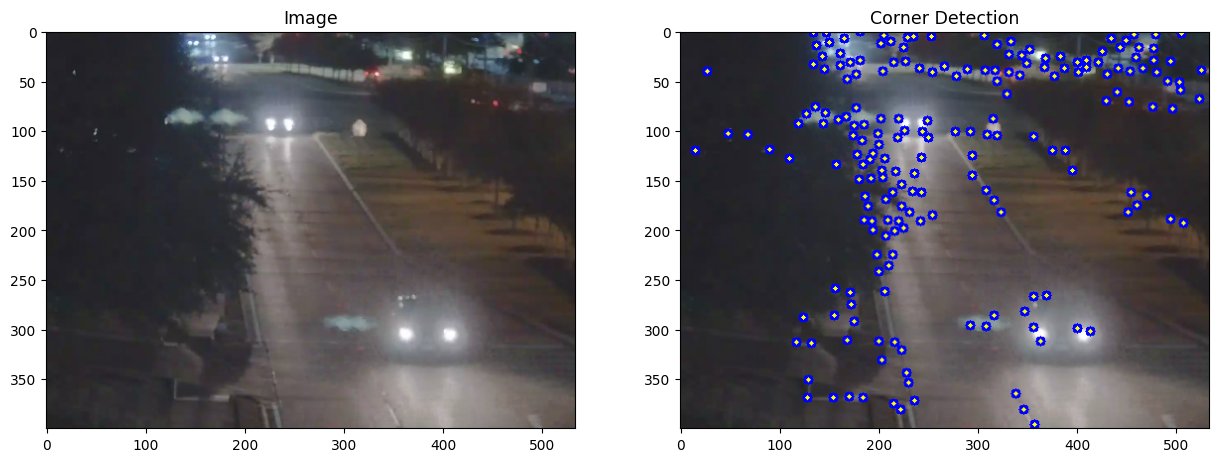

In [7]:
# Process Random Images
for i in range(num_of_frames):
    # Randomize Index
    index = 1900 #random.randint(0, total_frames)
    
    # Get Specific Frame
    video.set(1, index)  
    ret, frame = video.read()  
    
    # Preprocess Frame
    img, gray = preprocess_frame(frame, image_width, image_height)
    
    # Extract Features
    corners = feature_detector.extract(gray)
    
    # Calculate the Refined Corner Locations
    corners_refined = feature_detector.refine(gray, corners)
    
    # Add Corners to RGB Image
    img_copy = img.copy()
    for i in corners:
        x,y = i.ravel()
        cv2.circle(img_copy, center=(int(x), int(y)), radius=5, color=(0,0,255), thickness=-1)

    # Add Refined Corners to RGB Image
    for i in corners_refined:
        x,y = i.ravel()
        cv2.circle(img_copy, center=(int(x), int(y)), 
                radius=2, color=(255,255,0), thickness=-1)

    # Visualize
    fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,15))
    axis1.imshow(img)
    axis1.set_title('Image',fontsize=12.5)
    axis2.imshow(img_copy)
    axis2.set_title('Corner Detection',fontsize=12.5)